In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [20]:
class MLP(nn.Module):
    def __init__(self, layer_sizes, batch_size):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.bn = nn.BatchNorm1d(1)
        for i in range(len(layer_sizes)-1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            self.layers.append(nn.LeakyReLU())
    def forward(self,x):
        # x = self.bn(x)
        for layer in self.layers:
            x = layer(x)
        return x
class my_model(nn.Module):
    def __init__(self,dim_hidden=1, layer=1):
        super(my_model,self).__init__()
        self.process = nn.ModuleList([nn.Sequential(nn.Linear(1,dim_hidden),
                                                    nn.BatchNorm1d(dim_hidden),
                                                    nn.ReLU(inplace=True))])
        for _ in range(layer-1):
            self.process.append(nn.Sequential(
                nn.Linear(dim_hidden,dim_hidden),
                nn.BatchNorm1d(dim_hidden),
                nn.ReLU(inplace=True)
            ))
        self.process.append(nn.Linear(dim_hidden,1))
    def forward(self, x):
        for module in self.process:
            x = module(x)
        return x
epochs = 15000
batch_size = 3200

model=MLP(layer_sizes=[1,16,64,256,64,16,1], batch_size=batch_size).cuda()
model = my_model(128,4).cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)



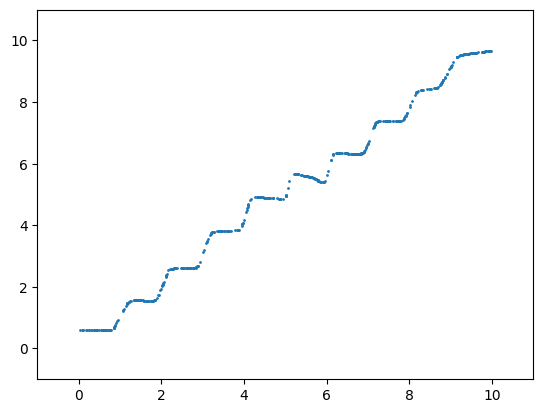

KeyboardInterrupt: 

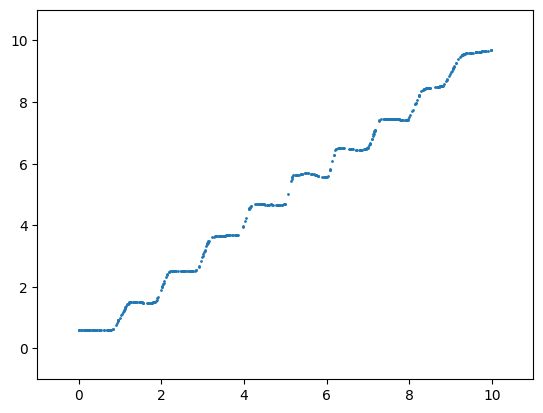

In [21]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
display(fig, display_id='plot')
for epoch in range(epochs):
    inputs = torch.rand(batch_size,1).cuda() * 10
    targets = torch.floor(inputs)+random.random()
    
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    test_inputs = torch.rand(500,1).cuda()*10
    with torch.no_grad():
        predicted_outputs = model(test_inputs)
        ax.set_xlim(-1, 11)
        ax.set_ylim(-1, 11)
        ax.scatter(test_inputs.cpu().numpy(), predicted_outputs.cpu().numpy(),s=1)
        display(fig, display_id='plot',update=True)
        ax.clear()